In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import binom

## Höffding 
Höffdingi võrratus annab ülemise tõkke tõenäosusele, et tõkestatud paarikaupa sõltumatute juhuslike suuruste summa erineb selle summa oodatud väärtusest vähemalt mingi konstandi võrra.
Täpsemalt, kui juhuslikud suurused $X_1 , X_2 , \dots , X_n$ on sõltumatud ja sellised, et $a_i \leq X_i \leq b_i$, siis iga positiivse $c$ korral

\begin{equation*}
    P ( \mid S_n - ES_n \mid \geq c ) \leq 2 \exp{ \left( - \frac{ 2 c^2 }{ \sum_{i=1}^{n} (b_i - a_i)^2 } \right) } \text{,}
\end{equation*}

kus $S_n = \sum_{i=1}^{n} X_i$.

Võttes juhuslikud suurused $X_i$ sellised, mis omandavad väärtuse $1$, kui mudel ennustas kirje puhul märgendi õigesti ning $0$, kui valesti, järeldub Höffdingi võrratusest seos

\begin{equation}
    P ( \mid \frac{ S_n }{ n } - \frac{ ES_n }{ n } \mid \geq \frac{ c }{ n } ) \leq 2 \exp{ \left( - \frac{ 2 c^2 }{ n } \right) } \text{.}
\end{equation}

Saadud tulemust saab kasutada valimi põhjal mudeli õigsusele usaldusvahemike leidmiseks.

Fikseerides mingi olulisusnivoo $\alpha$ lõigust $[0, 1]$ ja sättides sellele vastava usaldusnivoo ($1 - \alpha$) võrdseks võrratuse parema poolega saab tuletada seose

\begin{equation*}
     \varepsilon := \frac{c}{n} = \sqrt{ - \frac{1}{2n} \ln{ \left( \frac{ 1 - \alpha }{2} \right) } } \text{,}
\end{equation*}

kus $\varepsilon$ tähistab minimaalset viga valimi õigsuse ja tegeliku õigsuse vahel. Seda kasutades on fikseeritud olulisuse ja vea korral võimalik leida testandmestiku vajalik suurus.


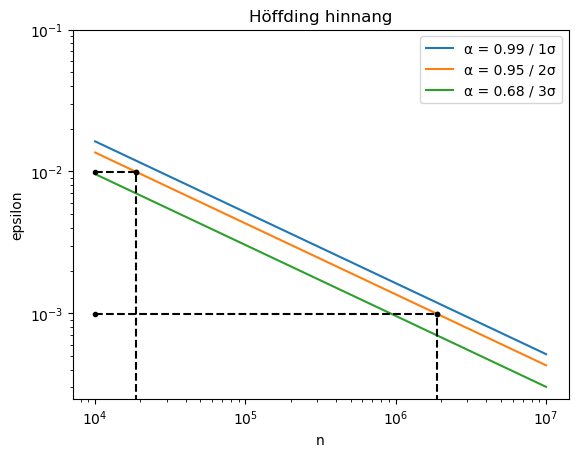

In [2]:
n = np.logspace(4, 7, num=100)
alpha = np.array([0.99, 0.95, 0.68])

epsilon_höffding = []
for a in alpha:
    ln = np.log((1 - a) / 2)
    epsilon = np.sqrt(-ln / (2 * n))
    
    epsilon_höffding.append(epsilon)
    
epsilon_höffding = np.array(epsilon_höffding)


for e in epsilon_höffding:
    plt.plot(n, e)


for e in [0.01, 0.001]:
    i = np.argmin(np.abs(epsilon_höffding[1] - e))
    plt.plot([n[0], n[i]], [epsilon_höffding[1][i], epsilon_höffding[1][i]], '.k--')
    plt.plot([n[i], n[i]], [0, epsilon_höffding[1][i]], '.k--')


plt.title('Höffding hinnang')
plt.legend([f'α = {a} / {i + 1}σ' for i, a in enumerate(alpha)])

plt.xlabel('n')
plt.xscale('log')
plt.xticks(np.logspace(4, 7, num=4))

plt.ylabel('epsilon')
plt.yscale('log')
plt.yticks(np.logspace(-3, -1, num=3))

plt.show()

# TODO tabelid

## Binoom

Kuna valitud juhuslikud suurused $X_i$ omandavad väärtusi $0$ ja $1$ on summa $S_n$ binoomjaotusega juhuslik suurus parameetritega $n$ ja $p$, kus $n$ on ennustuste arv ja $p$ on mudeli tegelik õigsus.

Eespool uuritud Höffdingi võrratusel põhinev hinnang selle omadusega ei arvestanud ning oli parameetrist $p$ sõltumatu, see tähendab, et tegu oli konservatiivse hinnanguga.

Kasutades teadmist, et uuritav summa on binoomjaotusega saab leida jaotuse parameetritest sõltuva hinnangu.

Olgu olulisusnivoo $\alpha = 0.95$ seekord fikseeritud, usalduspiiri $\varepsilon$ saab avaldada lähtudes võrrandist

\begin{equation*}
    P ( \mid \frac{ S_n }{ n } - p \mid \leq \varepsilon ) = 0.05 \text{,}
\end{equation*}

mis kehtib parajasti siis, kui

\begin{equation}
    \label{eq:binoom_usalduspiir}
    P ( S_n \leq np - n \varepsilon ) = \frac{ 0.05 }{ 2 }
\end{equation}

Saadud võrrandis on avaldis $np - n \varepsilon =: q$ suuruse $S_n$ $2.5\%$ protsendipunkt, ehk selline väärtus millest $S_n$ on väiksem $2.5\%$ juhtudest, seda saab leida kasutades $S_n$ jaotuse omadusi. Võrrandist avaldub usalduspiir $\varepsilon$ kujul

\begin{equation*}
    \varepsilon = p - \frac{ q }{ n } \text{,}
\end{equation*}

tulemust kasutades saab leida uued testandmestiku suurused soovitud usalduspiiride jaoks, kuid selle jaoks peab tegema mudeli tegeliku õigsuse $p$ kohta oletusi.

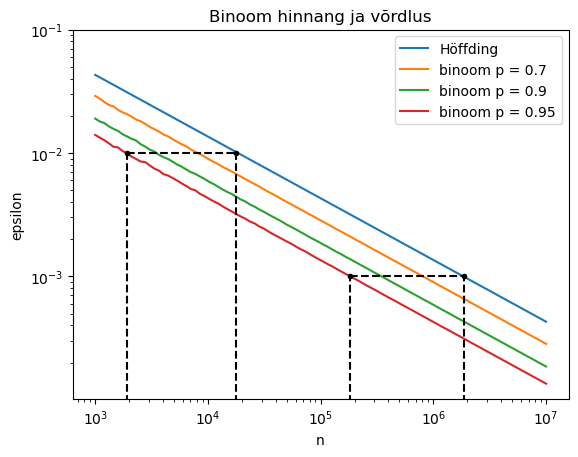

In [3]:
n = np.logspace(3, 7, num=100)
tõenäosused = np.array([0.7, 0.9, 0.95])

epsilon_höffding = np.sqrt(- np.log(0.025) / (2 * n))
epsilon_binoom = []
for p in tõenäosused:
    q = binom.ppf(q=0.025, p=p, n=n)
    epsilon = p - q / n
    
    epsilon_binoom.append(epsilon)
    
epsilon_binoom = np.array(epsilon_binoom)


plt.plot(n, epsilon_höffding)
for e in epsilon_binoom:
    plt.plot(n, e)


for e in [0.01, 0.001]:
    i_binoom = np.argmin(np.abs(epsilon_binoom[-1] - e))
    i_höffding = np.argmin(np.abs(epsilon_höffding - e))

    plt.plot([n[i_binoom], n[i_höffding]], [epsilon_binoom[-1][i_binoom], epsilon_binoom[-1][i_binoom]], '.k--')
    plt.plot([n[i_binoom], n[i_binoom]], [0, epsilon_binoom[-1][i_binoom]], 'k--')
    plt.plot([n[i_höffding], n[i_höffding]], [0, epsilon_binoom[-1][i_binoom]], 'k--')


plt.title('Binoom hinnang ja võrdlus')

plt.legend(['Höffding'] + [f'binoom p = {p}' for p in tõenäosused] )

plt.xlabel('n')
plt.xscale('log')
plt.xticks(np.logspace(3, 7, num=5))

plt.ylabel('epsilon')
plt.yscale('log')
plt.yticks(np.logspace(-3, -1, num=3))

plt.show()

# TODO tabelid

## Empiiriline testimine

Leitud tulemusi on võimalik testida empiiriliselt genereerides eeldustele vastavatest jaotustest juhuslikke andmeid ning seejärel kontrollides nende kokkuvalngevust leidudega. 

Joonisel on näha kirjeldatud meetodi tulemusi, kus Höffidingi hinnangu testandmed pärinevad binoomjaotusest $Bin(n = 17886, p = 0.5)$ ja täpse hinnangu andmed jaotusest $Bin(n = 3430, p = 0.9)$, joonisel on punaselt märgitud juhuslike andmete jaotuse $5\%$ protsendipunkt ja mustalt selle oodatud väärtus. 

Höffdingi hinnangu puhul langes saadud protsendipunkt oodatust madalamale, see tähendab, et meetod ülehindab vajalikku testandmestiku suurust. Erinvead parameetri $p$ väärtused võivad empiiriliselt leitud protsendipunkti nihutada kuid tulemust need ei muuda, sest Höffdingi hinnang on sellest sõltumatu.

Binoomjaotuse hinnangu puhul langesid oodatud protsendipunkt ja genereeritud jaotuse protsendipunkt kokku, seega annab meetod oodatud tulemuse. Kuigi hinnang on täpsem kui Höffdingi oma on selle meetodi puudujääk sõltuvus mudeli tegelikust õigsusest, mida peab oletama.

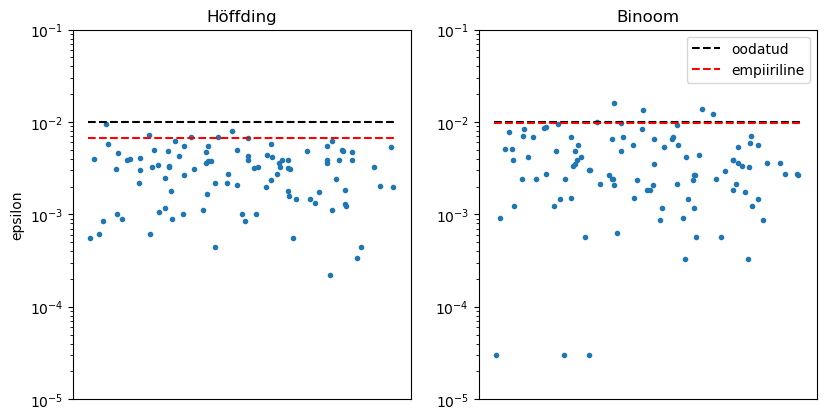

In [4]:
size = 100
i = int(size * 0.95) - 1
x = np.random.uniform(size=size)

plt.figure(figsize=[6.4 * 1.5, 4.8])

# höffding hinnang
plt.subplot(1, 2, 1)

# todo see pole vist päris õige
jaotus_höffding = np.abs(binom.rvs(p=0.5, n=17886, size=size) / 17886 - 0.5)  # hinnang on p-st sõltumatu
höffding_q95 = np.partition(jaotus_höffding, i)[i]

plt.plot([0, 1], [0.01, 0.01], 'k--')
plt.plot([0, 1], [höffding_q95, höffding_q95], 'r--')
plt.scatter(x, jaotus_höffding, marker='.')

plt.title('Höffding')
# plt.legend(['oodatud', 'empiiriline'])

plt.xticks([])

plt.ylabel('epsilon')
plt.yscale('log')
plt.yticks(np.logspace(-5, -1, num=5))

# binoom hinnang
plt.subplot(1, 2, 2)

jaotus_binoom = np.abs(binom.rvs(p=0.9, n=3351, size=size) / 3351 - 0.9)  # todo kust n tuli! sealt, kus epsilon_täpne == 0.01
binoom_q95 = np.partition(jaotus_binoom, i)[i]

plt.plot([0, 1], [0.01, 0.01], 'k--')
plt.plot([0, 1], [binoom_q95, binoom_q95], 'r--')
plt.scatter(x, jaotus_binoom, marker='.')

plt.title('Binoom')
plt.legend(['oodatud', 'empiiriline'])

plt.xticks([])

plt.yscale('log')
plt.yticks(np.logspace(-5, -1, num=5))

plt.show()